In [74]:
import pandas as pd
import numpy as np

## Gather

In [75]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [76]:
import requests
import os

In [77]:
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [78]:
response = requests.get(image_predictions_url)
response

<Response [200]>

In [79]:
with open(os.path.join(os.curdir,image_predictions_url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [80]:
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [74]:
import tweepy
import json
import time

consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

In [75]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
id_errors=[]
df_list=[]

with open('tweet_json.txt', 'a') as outfile:
    for i in twitter_archive.tweet_id:
        start = time.ctime()
        try:
            tweet = api.get_status(i,tweet_mode='extended')
            print (tweet.id,end=' ')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            df_list.append({'id': int(tweet.id),
                        'retweet_count': tweet.retweet_count,
                        'favorite_count': tweet.favorite_count})
        except Exception as e:
            print(str(tweet.id)+str(e))
            id_errors.append(tweet.id)
        print(start)

892420643555336193 Mon Jan 15 07:10:24 2018
892177421306343426 Mon Jan 15 07:10:24 2018
891815181378084864 Mon Jan 15 07:10:24 2018
891689557279858688 Mon Jan 15 07:10:24 2018
891327558926688256 Mon Jan 15 07:10:25 2018
891087950875897856 Mon Jan 15 07:10:25 2018
890971913173991426 Mon Jan 15 07:10:25 2018
890729181411237888 Mon Jan 15 07:10:25 2018
890609185150312448 Mon Jan 15 07:10:26 2018
890240255349198849 Mon Jan 15 07:10:26 2018
890006608113172480 Mon Jan 15 07:10:26 2018
889880896479866881 Mon Jan 15 07:10:26 2018
889665388333682689 Mon Jan 15 07:10:26 2018
889638837579907072 Mon Jan 15 07:10:26 2018
889531135344209921 Mon Jan 15 07:10:27 2018
889278841981685760 Mon Jan 15 07:10:27 2018
888917238123831296 Mon Jan 15 07:10:27 2018
888804989199671297 Mon Jan 15 07:10:27 2018
888554962724278272 Mon Jan 15 07:10:27 2018
888554962724278272[{'code': 144, 'message': 'No status found with that ID.'}]
Mon Jan 15 07:10:28 2018
888078434458587136 Mon Jan 15 07:10:28 2018
88770528938182656

In [1]:
len(id_errors)

NameError: name 'id_errors' is not defined

In [81]:
import json

df_json_list=[]

with open('tweet_json.txt') as readfile:
    for line in readfile:
        j = json.loads(line)
        df_json_list.append({'tweet_id': j['id'],
                            'retweet_count': j['retweet_count'],
                            'favorite_count': j['favorite_count']})

In [82]:
# Create DataFrame from list of dictionaries
tweet_json = pd.DataFrame(df_json_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweet_json = tweet_json.sort_values('tweet_id').reset_index(drop=True)
tweet_json

,tweet_id,retweet_count,favorite_count
0,666020888022790149,523,2527
1,666029285002620928,47,131
2,666033412701032449,46,126
3,666044226329800704,143,305
4,666049248165822465,40,110
5,666050758794694657,59,135
6,666051853826850816,869,1243
7,666055525042405380,259,446
8,666057090499244032,144,303
9,666058600524156928,59,115


## Assess

In [83]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [84]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [85]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,666020888022790149,523,2527
1,666029285002620928,47,131
2,666033412701032449,46,126
3,666044226329800704,143,305
4,666049248165822465,40,110
5,666050758794694657,59,135
6,666051853826850816,869,1243
7,666055525042405380,259,446
8,666057090499244032,144,303
9,666058600524156928,59,115


In [86]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [87]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [88]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 3 columns):
tweet_id          2348 non-null int64
retweet_count     2348 non-null int64
favorite_count    2348 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


In [89]:
twitter_archive[twitter_archive.name=='None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [90]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [91]:
twitter_archive.iloc[twitter_archive[twitter_archive.rating_numerator==960].index[0],5]
#twitter_archive[twitter_archive.rating_numerator==960]
# rating (numerator wrong for) row 313(rating-960),1202(rating-50),695(rating-75)

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [92]:
bad_num_rating_index =[313,1202,395]
bad_num_rating_id = []
for i in bad_num_rating_index:
    bad_num_rating_id.append(twitter_archive.iloc[i][0])

bad_num_rating_id

[835246439529840640, 716439118184652801, 825535076884762624]

In [93]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [94]:
#twitter_archive.iloc[twitter_archive[twitter_archive.rating_denominator==20].index[0],5]
#twitter_archive[twitter_archive.rating_denominator==20]
# rating (rating_denominator wrong for) row 516(rating-7),342(dm-15),2335(dm-2),1165&1598(dm-20),1202(dm-50),
#784&1068&1662(dm-11)


In [95]:
bad_denom_rating_index =[516,342,2335,1165,1598,1202,784,1068,1662]
bad_denom_rating_id = []
for i in bad_denom_rating_index:
    bad_denom_rating_id.append(twitter_archive.iloc[i][0])

bad_denom_rating_id

[810984652412424192,
 832088576586297345,
 666287406224695296,
 722974582966214656,
 686035780142297088,
 716439118184652801,
 775096608509886464,
 740373189193256964,
 682962037429899265]

In [96]:
twitter_archive[twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [97]:
#check the retweets
twitter_archive[twitter_archive.retweeted_status_id.isnull()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [98]:
# chk data after August 1st, 2017
twitter_archive[twitter_archive.timestamp=='2017-06-23']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [99]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Quality
#### `twitter_archive` table
- in_reply_to_status_id is float instead of int
- in_reply_to_user_id is float instead of int
- retweeted_status_id is float instead of int
- retweeted_status_user_id is float instead of int
- timestamp column is string instead of datetime 
- Default values for dog name ('a','an' and 'just')
- 181 rows are retweets
- Ratings are wrongly poplulated (Rating_numerator wrong for) row 433,313(rating-960),1202(rating-50),695(rating-75) (Have to update manually )
- Ratings are wrongly populated (rating_denominator wrong for) row 516(rating-7),342(dm-15),2335(dm-2),1165&1598(dm-20),1202&1274&1351(dm-50),784&1068&1662(dm-11) (Have to update manually )

#### Tidiness
- doggo ,floofer, pupper, puppo columns to be merged to create a single column 'Dog_Stages'
- retweet_count and favorite_count columns from 'tweet_json' table can be merger into 'twitter_archive' table

## Clean

In [100]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

#### Define
##### Change the data type of below columns to int from float:

- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id

##### Code

In [101]:
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.fillna(-999999).astype(int)

twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.fillna(-999999).astype(int)

twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.fillna(-999999).astype(int)

twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.fillna(-999999).astype(int)

twitter_archive_clean.replace(-999999, np.nan, inplace=True)

##### Timestamp column is string instead of datetime - change it

In [102]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

###### Test

In [103]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [104]:
twitter_archive_clean.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
474,816091915477250048,NaN,NaN,2017-01-03 01:20:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Comet. He's a Wild Estonian Poofer. Su...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816091915...,12,10,Comet,None,None,None,None
21,887705289381826560,NaN,NaN,2017-07-19 16:06:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He has a monopoly on the pool...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887705289...,13,10,Jeffrey,None,None,None,None
1960,673363615379013632,NaN,NaN,2015-12-06 04:49:31,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper can't wait for Christmas. H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673363615...,11,10,None,None,None,pupper,None
163,860276583193509888,NaN,NaN,2017-05-04 23:34:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,None,None,None,None
909,757725642876129280,NaN,NaN,2016-07-25 23:54:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Beckham. He fell asleep at the wheel. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757725642...,11,10,Beckham,None,None,None,None
1105,734912297295085568,NaN,NaN,2016-05-24 01:02:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He's a literal fluffball. Sneaky ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734912297...,10,10,Jax,None,None,None,None
929,754482103782404096,NaN,NaN,2016-07-17 01:05:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He's currently plotting his reve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754482103...,10,10,Milo,None,None,None,None
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,-2.147484e+09,811740824.0,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
2069,671134062904504320,NaN,NaN,2015-11-30 01:10:04,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Clarence. He's a western Alkaline...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671134062...,8,10,Clarence,None,None,None,None


#### Define
##### Should be no records with dog name 'a' , 'an' and 'just'

##### Code

In [105]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name != 'a']

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name != 'an']

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name != 'just']

##### Test

In [106]:
twitter_archive_clean.name.value_counts()

None         745
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Bailey         7
Buddy          7
Daisy          7
Toby           7
Milo           6
Leo            6
Dave           6
Oscar          6
Rusty          6
Jack           6
Bella          6
Scout          6
Koda           6
Stanley        6
Jax            6
Sunny          5
Sammy          5
George         5
            ... 
Pip            1
Zoe            1
Cilantro       1
Clifford       1
Jerome         1
Huxley         1
Jennifur       1
Lenox          1
Kane           1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Socks          1
Eazy           1
Finnegus       1
Lassie         1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn          1
Ester          1
Obi           

In [107]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2290 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2290 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2290 non-null datetime64[ns]
source                        2290 non-null object
text                          2290 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2231 non-null object
rating_numerator              2290 non-null int64
rating_denominator            2290 non-null int64
name                          2290 non-null object
doggo                         2290 non-null object
floofer                       2290 non-null object
pupper                        2290 non-null object
puppo                         2290 non-null object
dtypes: datetime64[ns](1

#### Define
##### Ratings are wrongly poplulated (Rating_numerator wrong for) row 313(rating-960),1202(rating-50),695(rating-75)
##### Ratings are wrongly poplulated (rating_denominator wrong for) row 516(rating-7),342(dm-15),2335(dm-2),1165&1598(dm-20),1202(dm-50),784&1068&1662(dm-11)

In [108]:
bad_num_rating_id

[835246439529840640, 716439118184652801, 825535076884762624]

In [109]:
#remove tweet_id=666287406224695296 because its a retweet
#bad_denom_rating_id.remove(666287406224695296)  #uncommnet this line for first time run
bad_denom_rating_id

[810984652412424192,
 832088576586297345,
 722974582966214656,
 686035780142297088,
 716439118184652801,
 775096608509886464,
 740373189193256964,
 682962037429899265]

##### Code

In [110]:
for i in bad_num_rating_id:
    print(str(i)+ '--' +twitter_archive_clean[twitter_archive_clean.tweet_id==i]['text'].values[0])

835246439529840640--@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
716439118184652801--This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
825535076884762624--Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1


##### Update the numerator ratings from text

In [111]:
twitter_archive_clean.set_value(twitter_archive_clean.index[twitter_archive_clean.tweet_id==835246439529840640][0],
                                'rating_numerator',
                               13)
print(twitter_archive_clean[twitter_archive_clean.tweet_id==835246439529840640]['rating_numerator'])
#############################################################################################################################
twitter_archive_clean.set_value(twitter_archive_clean.index[twitter_archive_clean.tweet_id==716439118184652801][0],
                                'rating_numerator',
                               11)
print(twitter_archive_clean[twitter_archive_clean.tweet_id==716439118184652801]['rating_numerator'])
#############################################################################################################################
twitter_archive_clean.set_value(twitter_archive_clean.index[twitter_archive_clean.tweet_id==825535076884762624][0],
                                'rating_numerator',
                               14)
print(twitter_archive_clean[twitter_archive_clean.tweet_id==825535076884762624]['rating_numerator'])

313    13
Name: rating_numerator, dtype: int64
1202    11
Name: rating_numerator, dtype: int64
395    14
Name: rating_numerator, dtype: int64


In [112]:
for i in bad_denom_rating_id:
    print(str(i)+ '--' +twitter_archive_clean[twitter_archive_clean.tweet_id==i]['text'].values[0])

#twitter_archive_clean[twitter_archive_clean.tweet_id==666287406224695296]['text']

810984652412424192--Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
832088576586297345--@docmisterio account started on 11/15/15
722974582966214656--Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
686035780142297088--Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating
716439118184652801--This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
775096608509886464--RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
740373189193256964--After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
682962037429899265--This is Darrel. He just robbe

In [113]:
twitter_archive_clean.set_value(twitter_archive_clean.index[twitter_archive_clean.tweet_id==810984652412424192][0],
                                'rating_denominator',
                               -999999)
print(twitter_archive_clean[twitter_archive_clean.tweet_id==810984652412424192]['rating_denominator'])
#############################################################################################################################
twitter_archive_clean.set_value(twitter_archive_clean.index[twitter_archive_clean.tweet_id==832088576586297345][0],
                                'rating_denominator',
                               -999999)
print(twitter_archive_clean[twitter_archive_clean.tweet_id==832088576586297345]['rating_denominator'])
#############################################################################################################################
twitter_archive_clean.set_value(twitter_archive_clean.index[twitter_archive_clean.tweet_id==722974582966214656][0],
                                'rating_denominator',
                               10)
print(twitter_archive_clean[twitter_archive_clean.tweet_id==722974582966214656]['rating_denominator'])
#############################################################################################################################
twitter_archive_clean.set_value(twitter_archive_clean.index[twitter_archive_clean.tweet_id==686035780142297088][0],
                                'rating_denominator',
                               20)
print(twitter_archive_clean[twitter_archive_clean.tweet_id==686035780142297088]['rating_denominator'])
#############################################################################################################################
twitter_archive_clean.set_value(twitter_archive_clean.index[twitter_archive_clean.tweet_id==716439118184652801][0],
                                'rating_denominator',
                               10)
print(twitter_archive_clean[twitter_archive_clean.tweet_id==716439118184652801]['rating_denominator'])
#############################################################################################################################
twitter_archive_clean.set_value(twitter_archive_clean.index[twitter_archive_clean.tweet_id==775096608509886464][0],
                                'rating_denominator',
                               10)
print(twitter_archive_clean[twitter_archive_clean.tweet_id==775096608509886464]['rating_denominator'])
#############################################################################################################################
twitter_archive_clean.set_value(twitter_archive_clean.index[twitter_archive_clean.tweet_id==740373189193256964][0],
                                'rating_denominator',
                               10)
print(twitter_archive_clean[twitter_archive_clean.tweet_id==740373189193256964]['rating_denominator'])
#############################################################################################################################
twitter_archive_clean.set_value(twitter_archive_clean.index[twitter_archive_clean.tweet_id==682962037429899265][0],
                                'rating_denominator',
                               10)
print(twitter_archive_clean[twitter_archive_clean.tweet_id==682962037429899265]['rating_denominator'])

twitter_archive_clean.replace(-999999, np.nan, inplace=True)

516   -999999
Name: rating_denominator, dtype: int64
342   -999999
Name: rating_denominator, dtype: int64
1165    10
Name: rating_denominator, dtype: int64
1598    20
Name: rating_denominator, dtype: int64
1202    10
Name: rating_denominator, dtype: int64
784    10
Name: rating_denominator, dtype: int64
1068    10
Name: rating_denominator, dtype: int64
1662    10
Name: rating_denominator, dtype: int64


##### Test

In [114]:
twitter_archive_clean[twitter_archive_clean.tweet_id==810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,NaN,Sam,None,None,None,None


##### Tideness
###### Define
###### doggo ,floofer, pupper, puppo columns to be melt to create a single column 'Dog_Stages'

In [115]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### Code

In [116]:
twitter_archive_clean = pd.melt(twitter_archive_clean,
                                id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id','timestamp', 'source',
                                         'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
                                         'rating_denominator', 'name'],
                               var_name='Dog_Stages_type',value_name='Dog_Stage')
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.Dog_Stage != 'None']
twitter_archive_clean = twitter_archive_clean.drop('Dog_Stages_type', axis=1)

###### Test

In [117]:
twitter_archive_clean.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Dog_Stage
5023,819238181065359361,NaN,NaN,2017-01-11 17:42:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Some happy pupper news to share. 10/10 for eve...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/200-do...,10,10.0,None,pupper
4676,873337748698140672,NaN,NaN,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,-2.147484e+09,-2.147484e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10.0,Sierra,pupper
777,775733305207554048,NaN,NaN,2016-09-13 16:30:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Anakin. He strives to reach his full d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775733305...,11,10.0,Anakin,doggo
5578,747651430853525504,-2.147484e+09,-2.147484e+09,2016-06-28 04:42:46,"<a href=""http://twitter.com/download/iphone"" r...",Other pupper asked not to have his identity sh...,NaN,NaN,NaN,NaN,12,10.0,None,pupper
5404,768909767477751808,NaN,NaN,2016-08-25 20:35:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When it's Janet from accounting...,-2.147484e+09,-2.147484e+09,2016-02-18 02:24:13 +0000,https://twitter.com/dog_rates/status/700143752...,10,10.0,None,pupper
2489,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10.0,None,floofer
5326,779377524342161408,NaN,NaN,2016-09-23 17:50:56,"<a href=""http://twitter.com/download/iphone"" r...",Have you ever seen such a smol pupper? Portabl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779377524...,12,10.0,None,pupper
1165,719991154352222208,NaN,NaN,2016-04-12 20:50:42,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10.0,None,doggo
500,813096984823349248,NaN,NaN,2016-12-25 19:00:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984...,11,10.0,Rocky,doggo
6884,889531135344209921,NaN,NaN,2017-07-24 17:02:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10.0,Stuart,puppo


###### retweet_count and favorite_count columns from 'tweet_json' table can be merger into 'twitter_archive' table
- also make them of int data type

###### Code

In [118]:
twitter_archive_clean = pd.merge(twitter_archive_clean,tweet_json_clean,
                            on=['tweet_id'], how='left')

In [119]:
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.fillna(-999999).astype(int)

twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.fillna(-999999).astype(int)

twitter_archive_clean.replace(-999999, np.nan, inplace=True)

##### Test

In [120]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Dog_Stage,retweet_count,favorite_count
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10.0,Cassie,doggo,7598.0,32292.0
1,884162670584377345,NaN,NaN,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10.0,Yogi,doggo,3068.0,20605.0
2,872967104147763200,NaN,NaN,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10.0,None,doggo,5592.0,27774.0
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10.0,Napolean,doggo,3578.0,20554.0
4,871102520638267392,NaN,NaN,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10.0,None,doggo,5675.0,21282.0
5,869596645499047938,NaN,NaN,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10.0,Scout,doggo,3268.0,16317.0
6,858843525470990336,NaN,NaN,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/858843525...,13,10.0,None,doggo,3709.0,16144.0
7,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10.0,None,doggo,18968.0,47391.0
8,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10.0,None,doggo,3400.0,17000.0
9,851953902622658560,NaN,NaN,2017-04-12 00:23:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,-2.147484e+09,-2.147484e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10.0,Astrid,doggo,10557.0,0.0


In [121]:
image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [122]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [123]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 384
Data columns (total 16 columns):
tweet_id                      385 non-null int64
in_reply_to_status_id         9 non-null float64
in_reply_to_user_id           9 non-null float64
timestamp                     385 non-null datetime64[ns]
source                        385 non-null object
text                          385 non-null object
retweeted_status_id           36 non-null float64
retweeted_status_user_id      36 non-null float64
retweeted_status_timestamp    36 non-null object
expanded_urls                 379 non-null object
rating_numerator              385 non-null int64
rating_denominator            385 non-null float64
name                          385 non-null object
Dog_Stage                     385 non-null object
retweet_count                 384 non-null float64
favorite_count                384 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(6)
memory usage: 51.1+ KB


In [124]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Stanley        6
Koda           6
Scout          6
Jax            6
Dave           6
Leo            6
Bella          6
Jack           6
Milo           6
Rusty          6
Oscar          6
Gus            5
            ... 
Tove           1
Glacier        1
Pip            1
Zoe            1
Cilantro       1
Jennifur       1
Olaf           1
Teddy          1
Socks          1
Snoop          1
Lenox          1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Eazy           1
Obi            1
Kane           1
Finnegus       1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn         

In [125]:
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False)

In [126]:
image_predictions_clean.to_csv('image_predictions_master.csv',index=False)

## Insights

##### Commonly used Dog names (after and before cleaning the data)

[<matplotlib.text.Text at 0xc2357f0>, <matplotlib.text.Text at 0xc1a77b8>]

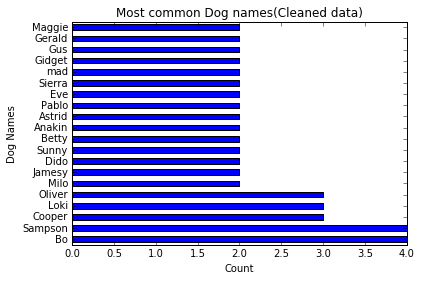

In [127]:
ax = twitter_archive_clean.name.value_counts().drop('None')[:20].plot(kind='barh',title='Most common Dog names(Cleaned data)')
ax.set(xlabel='Count',ylabel='Dog Names')

[<matplotlib.text.Text at 0xd53d860>, <matplotlib.text.Text at 0xc21e828>]

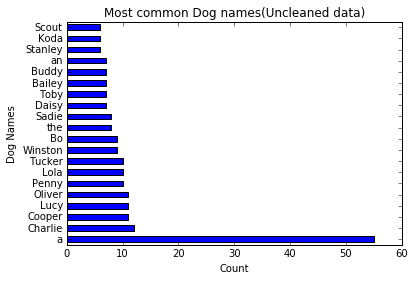

In [128]:
ax1 = twitter_archive.name.value_counts().drop('None')[:20].plot(kind='barh',title='Most common Dog names(Uncleaned data)')
ax1.set(xlabel='Count',ylabel='Dog Names')

#####  Common ratings (after and before cleaning the data)

[<matplotlib.text.Text at 0xd812eb8>, <matplotlib.text.Text at 0xda47eb8>]

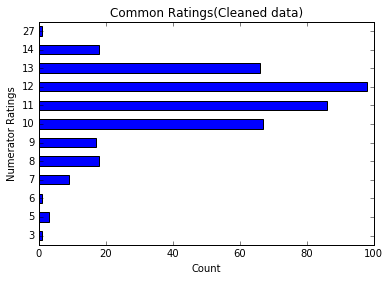

In [129]:
ax2 = twitter_archive_clean.rating_numerator.value_counts().sort_index().plot(kind='barh',title='Common Ratings(Cleaned data)')
ax2.set(xlabel='Count',ylabel='Numerator Ratings')

[<matplotlib.text.Text at 0xdcf3160>, <matplotlib.text.Text at 0xd812198>]

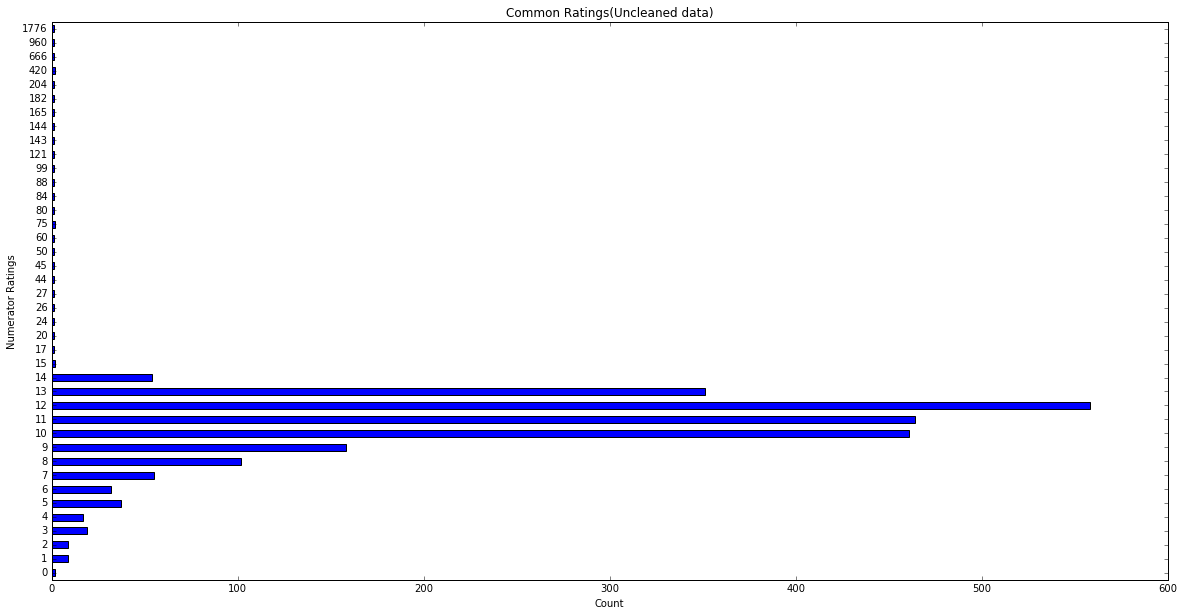

In [130]:
ax3 = twitter_archive.rating_numerator.value_counts().sort_index().plot(kind='barh',
                                                                  figsize=(20,10),title='Common Ratings(Uncleaned data)')
ax3.set(xlabel='Count',ylabel='Numerator Ratings')

##### Most favorited tweet of all

In [131]:
max_fav_id = twitter_archive_clean[twitter_archive_clean.favorite_count==twitter_archive_clean.favorite_count.max()]['tweet_id']
max_fav_id = max_fav_id.values[0]
max_fav_id

822872901745569793

In [132]:
import requests
from ipywidgets import Image

Image(value=requests.get(image_predictions_clean[image_predictions_clean.tweet_id==max_fav_id]['jpg_url'].values[0]).content)

#### Most retweeted tweet

In [133]:
max_retweet_id = twitter_archive_clean[twitter_archive_clean.retweet_count==twitter_archive_clean.retweet_count.max()]['tweet_id']
max_retweet_id = max_retweet_id.values[0]
max_retweet_id

744234799360020481

In [134]:
Image(value=requests.get(image_predictions_clean[image_predictions_clean.tweet_id==max_retweet_id]['jpg_url'].values[0]).content)

[<matplotlib.text.Text at 0xdf549b0>, <matplotlib.text.Text at 0xdfc1a58>]

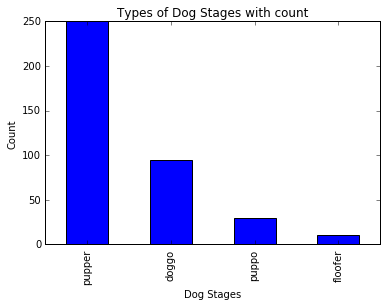

In [135]:
ax4 = twitter_archive_clean.Dog_Stage.value_counts().plot(kind='bar',title='Types of Dog Stages with count')
ax4.set(xlabel='Dog Stages',ylabel='Count')